## Normality Tests

### Benchmark Case

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [3]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

In [4]:
paths = gen_paths(S0, r, sigma, T, M, I)

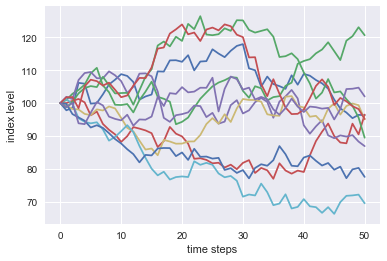

In [5]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [6]:
log_returns = np.log(paths[1:] / paths[0:-1]) 

In [7]:
paths[:, 0].round(4)

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [8]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [12]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))

In [13]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


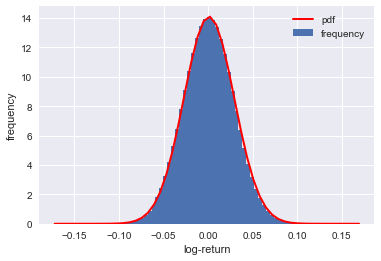

In [14]:
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()

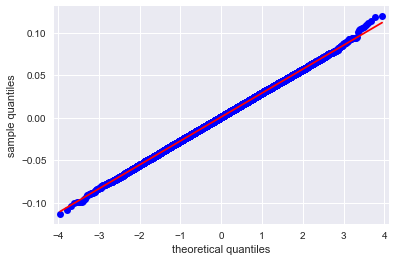

In [15]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [16]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print ("Skew of data set  %14.3f" % scs.skew(arr))
    print ("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print ("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

SyntaxError: invalid syntax (<ipython-input-16-097c0840903d>, line 9)

In [17]:
normality_tests(log_returns.flatten())

NameError: name 'normality_tests' is not defined

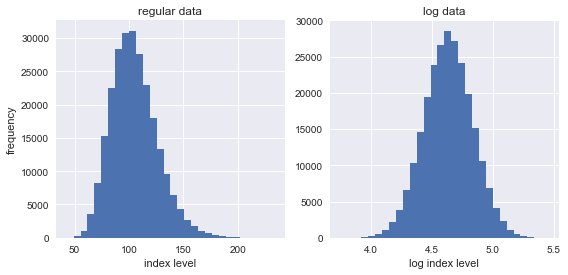

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
# tag: normal_sim_3
# title: Histogram of simulated end-of-period index levels
# size: 90

In [19]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [20]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [21]:
normality_tests(np.log(paths[-1]))

NameError: name 'normality_tests' is not defined

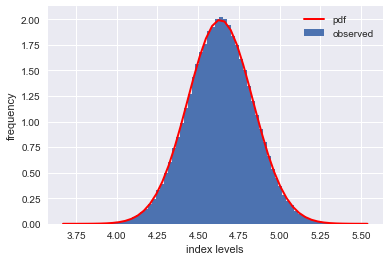

In [22]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend()

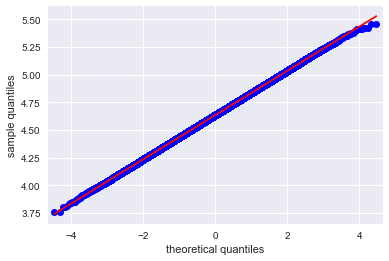

In [23]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

### Real World Data

In [24]:
import pandas as pd
from pandas_datareader import data as web

In [25]:
symbols = ['^GDAXI', '^GSPC', 'YHOO', 'MSFT']

In [26]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',
                            start='1/1/2006')['Adj Close']
data = data.dropna()

ConnectionError: HTTPConnectionPool(host='ichart.finance.yahoo.com', port=80): Max retries exceeded with url: /table.csv?s=%5EGDAXI&a=0&b=1&c=2006&d=5&e=27&f=2017&g=d&ignore=.csv (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x0000023A88CE0898>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [28]:
data.head()

""


In [29]:
(data / data.ix[0] * 100).plot(figsize=(8, 6), grid=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


IndexError: index 0 is out of bounds for axis 0 with size 0

In [30]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

""


In [31]:
log_returns.hist(bins=50, figsize=(9, 6))

ValueError: num must be 1 <= num <= 0, not 1

In [32]:
for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-32-1527ab94b7de>, line 2)

In [33]:
sm.qqplot(log_returns['^GSPC'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

KeyError: '^GSPC'

In [ ]:
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [ ]:
for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)

## Portfolio Optimization

### The Data

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
symbols = ['AAPL', 'MSFT', 'YHOO', 'DB', 'GLD']
noa = len(symbols)

In [ ]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo',
                               end='2014-09-12')['Adj Close']
data.columns = symbols

In [ ]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)

In [ ]:
rets = np.log(data / data.shift(1))

In [ ]:
rets.mean() * 252

In [ ]:
rets.cov() * 252

### The Basic Theory

In [ ]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [ ]:
weights

In [ ]:
np.sum(rets.mean() * weights) * 252
  # expected portfolio return

In [ ]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
  # expected portfolio variance

In [ ]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
  # expected portfolio standard deviation/volatility

In [ ]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap=plt.cm.coolwarm)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Portfolio Optimizations

In [ ]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [ ]:
import scipy.optimize as sco

In [ ]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in range(noa))

In [ ]:
noa * [1. / noa,]

In [ ]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [ ]:
opts

In [ ]:
opts['x'].round(3)

In [ ]:
statistics(opts['x']).round(3)

In [ ]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [ ]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [ ]:
optv

In [ ]:
optv['x'].round(3)

In [ ]:
statistics(optv['x']).round(3)

### Efficient Frontier

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [ ]:
def min_func_port(weights):
    return statistics(weights)[1]

In [ ]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o', cmap=plt.cm.coolwarm)
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x', cmap=plt.cm.coolwarm)
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Capital Market Line

In [ ]:
import scipy.interpolate as sci

In [ ]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [ ]:
tck = sci.splrep(evols, erets)

In [ ]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [ ]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [ ]:
opt

In [ ]:
np.round(equations(opt), 6)

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o', cmap=plt.cm.coolwarm)
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
sns.set_palette("husl")
plt.colorbar(label='Sharpe ratio')

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [ ]:
res['x'].round(3)